# Health Data Analysis
## Mortality among children 
This Project shows the chance of a child aged 5-14 dying before reaching 15. It's presented as a probability per 1,000 children (written as 10q5).  

The data comes from the UN Inter-agency Group for Child Mortality Estimation (UN IGME) in 2019. You can find the original source at [http://www.childmortality.org](http://www.childmortality.org). Though I downloaded the data from Kaggle.

There are two additional points to note:
* "Lower" and "Upper" refer to the best and worst-case scenarios within a 90% confidence range. 
* The regions are categorized according to UNICEF's regional classification system. 


### Importing standard libraries

In [170]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Loading and cleaning the data

In [142]:
#Loading the data
df = pd.read_csv("deaths.csv", delimiter=';')

In [143]:
df.head(5)

,region,Unnamed: 1,Unnamed: 2,median,upper,lower,median.1,upper.1
0,Sub-Saharan Africa,NaN,NaN,"39,820157","42,396932",568662,591774,626820
1,West and Central Africa,NaN,NaN,"40,214721","44,137154",262349,279006,303798
2,Eastern and Southern Africa,NaN,NaN,"39,474451","42,521735",295842,312767,334924
3,Middle East and North Africa,NaN,NaN,"9,516906","10,260104",63007,66627,71738
4,South Asia,NaN,NaN,"20,386521","21,239496",561782,582802,605420


In [144]:
df.describe()

,Unnamed: 1,Unnamed: 2,lower,median.1,upper.1
count,0.0,0.0,3.480000e+02,3.480000e+02,3.480000e+02
mean,NaN,NaN,2.581479e+05,2.693984e+05,2.858912e+05
std,NaN,NaN,3.618285e+05,3.713697e+05,3.867885e+05
min,NaN,NaN,4.043000e+03,4.173000e+03,4.337000e+03
25%,NaN,NaN,2.852650e+04,2.955600e+04,3.077225e+04
50%,NaN,NaN,7.565650e+04,8.906800e+04,1.119010e+05
75%,NaN,NaN,2.985790e+05,3.262318e+05,3.560085e+05
max,NaN,NaN,1.678924e+06,1.718785e+06,1.783894e+06


In [145]:
# Dropping columns with NaN values
df.dropna(axis='columns')

,region,median,upper,lower,median.1,upper.1
0,Sub-Saharan Africa,"39,820157","42,396932",568662,591774,626820
1,West and Central Africa,"40,214721","44,137154",262349,279006,303798
2,Eastern and Southern Africa,"39,474451","42,521735",295842,312767,334924
3,Middle East and North Africa,"9,516906","10,260104",63007,66627,71738
4,South Asia,"20,386521","21,239496",561782,582802,605420
...,...,...,...,...,...,...
343,North America,"1,310027","1,410277",5576,5984,6446
344,Europe and Central Asia,"1,598955","1,65677",16979,17490,18112
345,Eastern Europe and Central Asia,"2,322299","2,428431",12802,13317,13909
346,Western Europe,"0,802117","0,8337",4043,4173,4337


## EDA

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



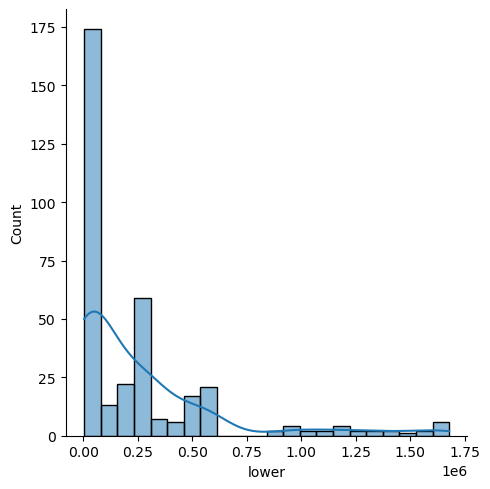

In [258]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df is your DataFrame and you want to create a distribution plot

sns.displot(df["lower"], kde=True)  # Use displot with kde=True for a distribution plot with kernel density estimation
plt.show()

In [262]:
sns.scatterplot(x='lower',y='median.1',data=df)

<Axes: xlabel='lower', ylabel='median.1'>

In [264]:
sns.countplot(df["upper.1"])

<Axes: xlabel='lower', ylabel='count'>

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



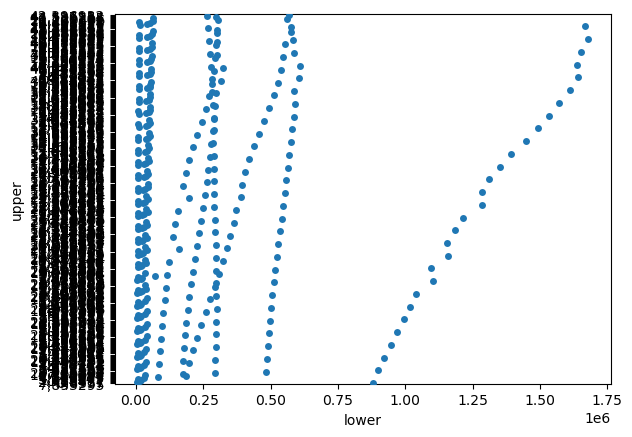

<Figure size 400x300 with 0 Axes>

In [217]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df is your DataFrame and you want to create a swarmplot
ax = sns.swarmplot(x="lower", y="upper", data=df)
plt.figure(figsize=(4, 3))
plt.show()

Skew is: -0.12322414080607406


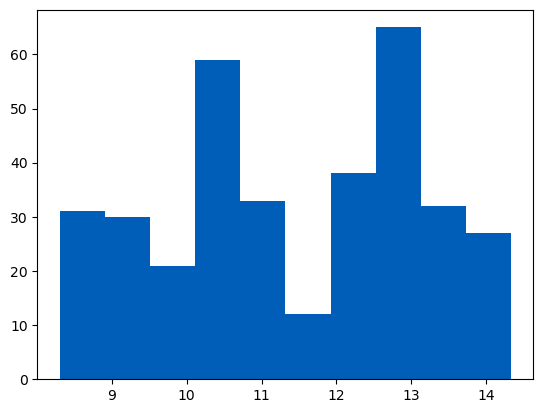

In [224]:
target = np.log(df.lower)
print ("Skew is:", target.skew())
plt.hist(target, color='#005eb8')
plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 500x300 with 0 Axes>

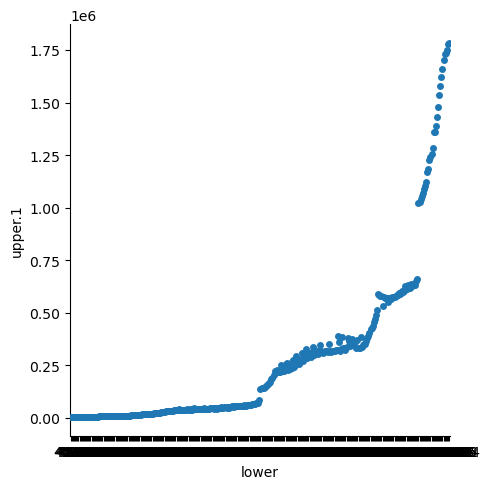

In [231]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Assuming df1 is your DataFrame and you want to create a categorical plot (catplot)
plt.figure(figsize=(5, 3))
sns.catplot(x="lower", y="upper.1", data=df)
plt.ioff()  # Turn off interactive mode to avoid showing additional plots

plt.show()

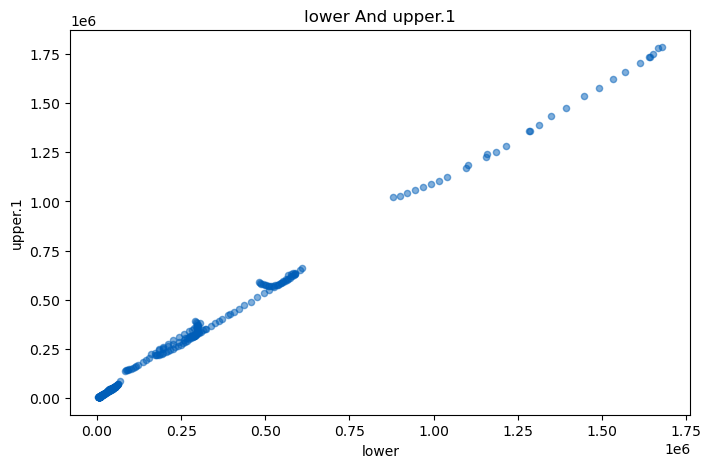

In [202]:
df.plot(kind='scatter', x='lower', y='upper.1', alpha=0.5, color='#005eb8', figsize = (8,5))
plt.title('lower And upper.1')
plt.xlabel("lower")
plt.ylabel("upper.1")
plt.show()

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



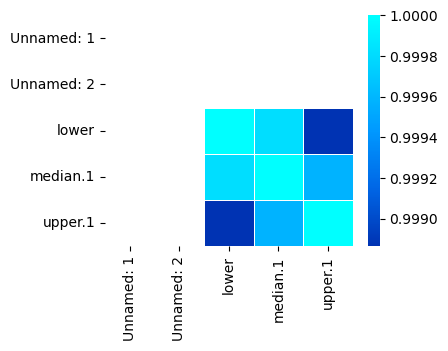

In [201]:
from matplotlib.colors import LinearSegmentedColormap

df_numeric = df.select_dtypes(include=[np.number])

colors = [(0, 0.2, 0.7), (0, 0.4, 0.9), (0, 0.6, 1), (0, 0.8, 1), (0, 1, 1)]  # Shades of blue
custom_cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Plot correlation heatmap with custom colormap
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap=custom_cmap)
plt.show()

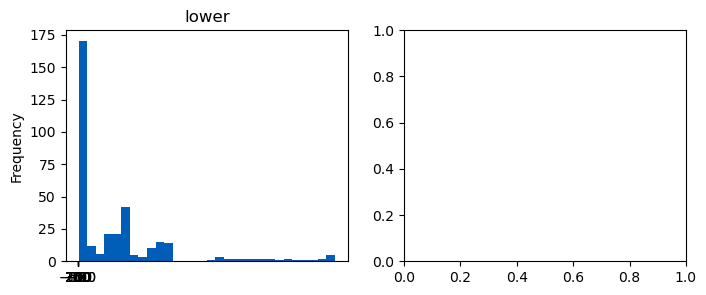

In [207]:
f,ax=plt.subplots(1,2,figsize=(8,3))
df.lower.plot.hist(ax=ax[0],bins=30,color='#005eb8')
ax[0].set_title('lower')
x1=list(range(-150,350,50))
ax[0].set_xticks(x1)
plt.show()

<Figure size 800x800 with 0 Axes>

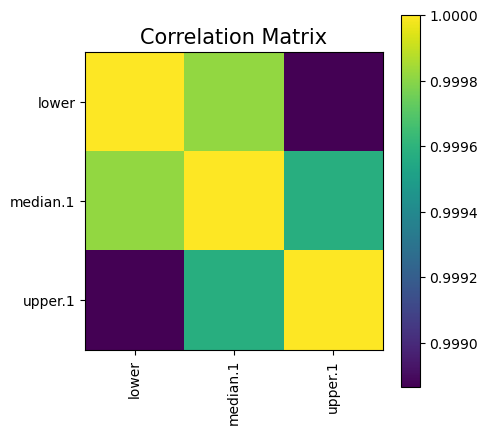

In [256]:
# Drop non-numeric columns and columns with NaN values
numeric_df = df.select_dtypes(include='number').dropna(axis='columns')

# Check if there are enough columns for correlation analysis
if numeric_df.shape[1] < 2:
    print('No correlation plots shown: The number of numeric columns is less than 2')
else:
    # Calculate correlation matrix
    corr = numeric_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 8))  # Set the figure size
    corrMat = plt.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

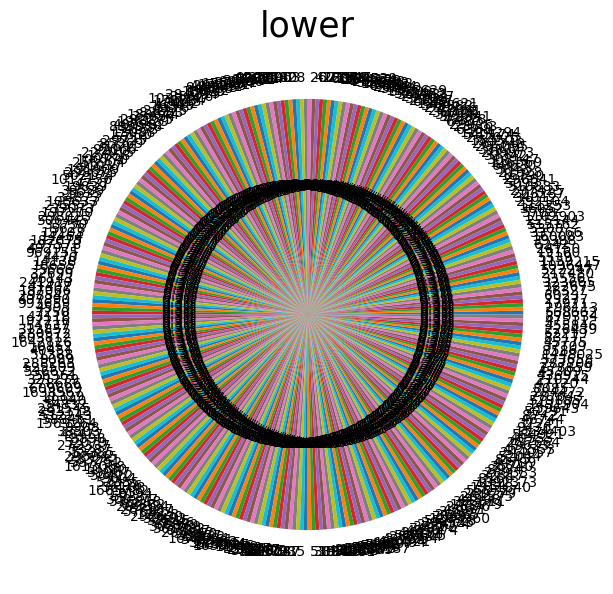

In [219]:
labels1=df.lower.value_counts().index
sizes1=df.lower.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes1,labels=labels1,autopct="%1.1f%%")
plt.title("lower",size=25)
plt.show()

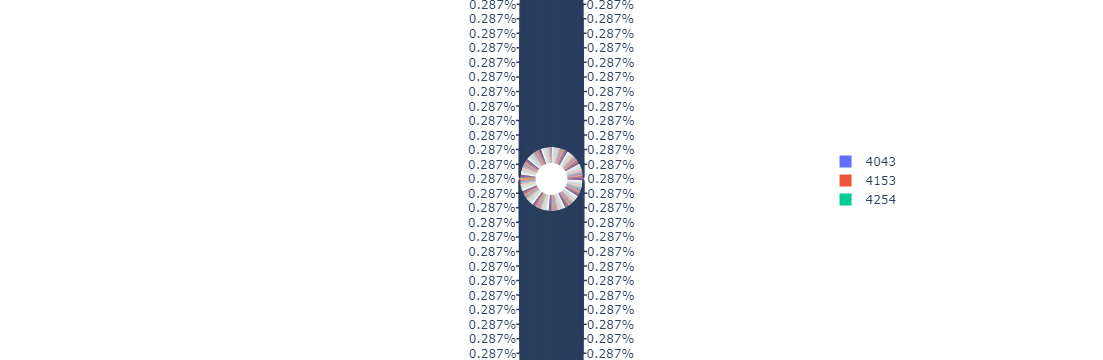

In [265]:
import plotly.offline as pyo
import plotly.graph_objs as go
lowerdf1 = df.groupby('lower').size()/df['lower'].count()*100
labels = lowerdf1.index
values = lowerdf1.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()
